In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
    '../data/cleaned/final_combined.csv',
    dtype = {'fips':object}
)
df

,fips,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013,average_2011_upper_bound_pct_obesity,FIPS,heart_disease_prev_100K
0,01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0,42.970,1001,71.952925
1,01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0,37.685,1003,58.781387
2,01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0,51.675,1005,63.554734
3,01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0,47.940,1007,79.901207
4,01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0,45.425,1009,65.344687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0,39.170,56037,57.186138
3128,56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0,23.825,56039,41.840714
3129,56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0,39.580,56041,53.049534
3130,56043,8027.0,42.9,102.6,24.6,75.4,21.1,Washakie County,Wyoming,3365.0,54158.0,65496.0,2191.0,68265.0

In [3]:
# Smoking ban is the only variable that has null values. We'll check what the prevalent one is and fillna().
df.isna().sum()

fips                                      0
total_pop_age_sex                         0
median_age                                0
sex_ratio_males                           0
under_18_percent                          0
over_18_percent                           0
over_65_percent                           0
county                                    0
state                                     0
total_hh                                  0
median_hh_income                          0
mean_hh_income                            0
total_families                            0
median_family_income                      0
mean_family_income                        0
tot_pop_race_ethnicity                    0
tot_white                                 0
tot_black_af_am                           0
tot_aminalnat                             0
tot_asian                                 0
tot_hawopi                                0
total_pop_poverty                         0
pop_below_poverty               

In [4]:
df['smoking_ban_2010'].value_counts(normalize=True)

none             0.618480
partial          0.203799
comprehensive    0.177721
Name: smoking_ban_2010, dtype: float64

In [5]:
df['smoking_ban_2010'].fillna('none', inplace=True)

In [6]:
# Confirming we got all of them. We replaced with 'none' instead of zero so that the missing would match the 'none' category.
df['smoking_ban_2010'].isna().sum()

0

In [7]:
# Set the index to FIPS.
df.set_index('fips',inplace=True)

In [8]:
# Getting descriptive statistics for the variables in the dataframe.
round(df.describe()).T

,count,mean,std,min,25%,50%,75%,max
total_pop_age_sex,3132.0,103141.0,331431.0,66.0,11006.0,25854.0,67886.0,10081570.0
median_age,3132.0,41.0,5.0,22.0,38.0,41.0,44.0,67.0
sex_ratio_males,3132.0,101.0,11.0,75.0,96.0,99.0,102.0,267.0
under_18_percent,3132.0,22.0,4.0,2.0,20.0,22.0,24.0,42.0
over_18_percent,3132.0,78.0,4.0,58.0,76.0,78.0,80.0,98.0
over_65_percent,3132.0,19.0,5.0,3.0,16.0,18.0,21.0,57.0
total_hh,3132.0,38366.0,116757.0,30.0,4301.0,9945.0,26114.0,3316795.0
median_hh_income,3132.0,53483.0,14233.0,21504.0,44157.0,51747.0,59846.0,142299.0
mean_hh_income,3132.0,70201.0,17457.0,35819.0,59225.0,66864.0,76914.0,181261.0
total_families,3132.0,25134.0,76186.0,9.0,2817.0,6652.0,17196.0,2210939.0


(Note that the race/ethnicity numbers in this output aren't the same values we used in our presentation. The presentation numbers were directly from the Census Bureau's overall race/ethnicity numbers which were calculated, for example, as "white only" as opposed to the `white_2019` feature in our dataset here which included percentages of anyone who identified as white only or white in addition to another race. The Census began including the ability to choose more than one race during the 2000 Census.)

#### Let's try a clustering algorithm.

In [9]:
# Checking to see which of these duplicate columns we should drop. 
# We used this cell iteratively to examine different features of the dataframe.

df[['FIPS',
    'state', 
    'county',
    'pop_2019',
    'total_pop_age_sex',
    'white_2019',
    'white_not_hispanic_2019',
    'native_2019',
    'pac_isl_2019',
    'black_2019',
    'hispanic_2019',
    'asian_2019',
    'Metro2013',
    'rural_urban_continuum_code_2013',
    'retirement_destination_2015_update'
   ]]

,FIPS,state,county,pop_2019,total_pop_age_sex,white_2019,white_not_hispanic_2019,native_2019,pac_isl_2019,black_2019,hispanic_2019,asian_2019,Metro2013,rural_urban_continuum_code_2013,retirement_destination_2015_update
fips,,,,,,,,,,,,,,,
01001,1001,Alabama,Autauga County,55380.0,55380.0,76.8,74.6,0.3,0.0,19.0,2.8,1.0,1.0,2.0,1.0
01003,1003,Alabama,Baldwin County,212830.0,212830.0,86.2,83.1,0.8,0.0,9.3,4.6,0.9,1.0,3.0,1.0
01005,1005,Alabama,Barbour County,25361.0,25361.0,46.8,45.8,0.3,0.0,47.6,4.4,0.5,0.0,6.0,0.0
01007,1007,Alabama,Bibb County,22493.0,22493.0,76.8,74.5,0.1,0.0,22.3,2.6,0.1,1.0,1.0,0.0
01009,1009,Alabama,Blount County,57681.0,57681.0,95.5,86.9,0.1,0.0,1.6,9.3,0.4,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,56037,Wyoming,Sweetwater County,43521.0,43521.0,93.4,79.6,1.2,0.0,1.2,15.9,0.8,0.0,5.0,0.0
56039,56039,Wyoming,Teton County,23280.0,23280.0,89.3,81.3,0.3,0.1,1.2,15.0,1.3,0.0,7.0,0.0
56041,56041,Wyoming,Uinta County,20479.0,20479.0,93.4,87.5,0.7,0.0,0.1,9.1,0.2,0.0,7.0,0.0


In [10]:
df_tx = df[df['state']== ' Texas']
df_tx

,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013,average_2011_upper_bound_pct_obesity,FIPS,heart_disease_prev_100K
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48001,57810.0,39.3,155.7,19.5,80.5,14.3,Anderson County,Texas,16677.0,43455.0,56912.0,11602.0,53519.0,64282.0,57810.0,42217.0,12124.0,317.0,321.0,9.0,44348.0,6598.0,14.9,none,0.6,3.21,21.0,17.8,67.9,63.0,73.9,16677.0,3.2,30.4,81.3,43455.0,23143.0,0.5,3.3,0.0,2.66,57810.0,3.3,14.5,8.7,73.0,58.9,7.0,0.0,0.0,0.0,43.665,48001,68.349249
48003,18036.0,30.8,103.5,31.5,68.5,10.0,Andrews County,Texas,5573.0,76158.0,92927.0,4273.0,83799.0,102156.0,18036.0,16108.0,122.0,0.0,65.0,31.0,17927.0,1647.0,9.2,none,0.4,3.73,0.7,56.3,86.2,71.6,84.1,5573.0,10.2,25.9,72.3,76158.0,33373.0,0.0,6.1,0.2,3.22,18036.0,3.9,19.8,5.5,89.3,40.2,6.0,0.0,0.0,1.0,46.545,48003,69.646064
48005,87322.0,37.5,95.3,25.7,74.3,15.9,Angelina County,Texas,31035.0,50453.0,63164.0,22700.0,57524.0,70829.0,87322.0,69651.0,12890.0,490.0,975.0,5.0,84680.0,15026.0,17.7,none,1.1,3.17,14.8,22.1,82.3,71.1,78.1,31035.0,2.7,33.8,81.9,50453.0,24657.0,0.6,2.2,0.0,2.72,87322.0,6.2,18.8,8.8,79.8,60.5,5.0,0.0,0.0,0.0,45.275,48005,76.484950
48007,24462.0,50.6,94.8,18.8,81.2,27.4,Aransas County,Texas,9548.0,45137.0,75855.0,6132.0,58299.0,86457.0,24462.0,22115.0,354.0,53.0,489.0,0.0,24070.0,5127.0,21.3,none,2.0,3.16,1.4,27.5,81.8,77.5,78.1,9548.0,2.8,19.8,84.5,45137.0,21631.0,0.2,1.9,0.0,2.52,24462.0,7.5,20.0,12.1,90.4,67.4,2.0,1.0,1.0,0.0,43.945,48007,52.755955
48009,8716.0,44.5,99.5,21.7,78.3,19.5,Archer County,Texas,3452.0,63835.0,83749.0,2402.0,83672.0,99886.0,8716.0,8315.0,83.0,96.0,15.0,0.0,8647.0,1033.0,11.9,none,0.2,3.04,1.0,8.3,75.4,70.5,80.0,3452.0,2.1,16.3,90.3,63835.0,32611.0,1.1,0.5,0.0,2.50,8716.0,2.6,12.9,8.8,95.4,88.3,3.0,1.0,0.0,0.0,43.560,48009,54.978487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48499,44366.0,47.9,98.9,19.4,80.6,26.7,Wood County,Texas,16510.0,53394.0,70971.0,11642.0,64187.0,83430.0,44366.0,39622.0,2224.0,397.0,286.0,37.0,42759.0,6257.0,14.6,comprehensive,0.6,3.13,5.0,10.0,77.5,73.2,75.0,16510.0,1.1,19.8,84.7,53394.0,25192.0,0.9,2.6,0.1,2.59,44366.0,5.4,13.1,11.6,89.3,82.5,6.0,0.0,1.0,1.0,44.980,48499,67.041721
48501,8631.0,30.3,107.9,33.0,67.0,11.5,Yoakum County,Texas,2617.0,70005.0,80243.0,1985.0,73576.0,91951.0,8631.0,8311.0,38.0,15.0,4.0,0.0,8631.0,726.0,8.4,none,0.0,3.96,0.4,66.5,75.0,58.7,86.1,2617.0,15.2,22.0,63.5,70005.0,34598.0,0.2,1.6,0.0,3.30,8631.0,4.6,27.9,2.7,96.3,31.8,7.0,0.0,0.0,0.0,46.915,48501,56.447088
48503,18036.0,41.1,95.0,24.3,75.7,20.4,Young County,Texas,7307.0,50635.0,67391.0,5178.0,66381.0,80689.0,18036.0,17264.0,379.0,134.0,48.0,0.0,17715.0,2183.0,12.3,none,0.3,2.86,2.1,18.7,75.0,65.1,76.7,7307.0,7.0,24.4,83.0,50635.0,27199.0,0.7,0.8,0.0,2.43,18036.0,3.8,19.4,8.9,95.7,77.9,7.0,0.0,0.0,0.0,44.150,48503,65.106934


When we initially ran the k-means clustering algorithm, we decided to throw a lot of variables at the model. These were the only ones that we initially dropped. However, the silhouette score loop algorithm kept recommending only two clusters (not useful in this context), even when we focused just on Texas. We include this code just to show the analytic and modeling process.

```python
X = df_tx.drop(columns = ['tot_pop_race_ethnicity',
                      'total_pop_poverty',
                      'median_household_income_2019',
                      'median_individual_income_2019',
                       'tot_white',
                       'tot_black_af_am',
                       'tot_aminalnat',
                       'tot_asian',
                       'tot_hawopi',
                       'white_2019',
                       'pop_below_poverty',
                       'under_18_percent',
                       'mean_hh_income',
                       'total_families',
                       'mean_family_income',
                       'total_pop_age_sex',
                       'FIPS',
                       'county', # Would be "cheating" to include county and state.
                      'state'
                     ])
```

You can see in this next cell all the columns we had to pick from initially.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 01001 to 56045
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   total_pop_age_sex                      3132 non-null   float64
 1   median_age                             3132 non-null   float64
 2   sex_ratio_males                        3132 non-null   float64
 3   under_18_percent                       3132 non-null   float64
 4   over_18_percent                        3132 non-null   float64
 5   over_65_percent                        3132 non-null   float64
 6   county                                 3132 non-null   object 
 7   state                                  3132 non-null   object 
 8   total_hh                               3132 non-null   float64
 9   median_hh_income                       3132 non-null   float64
 10  mean_hh_income                         3132 non-null   float64
 11  tota

We finally opted to just look at the following five features for our clustering algorithm.

In [12]:
X = df[['percent_below_poverty', 
        'smoking_ban_2010', 
        'unemployment_rate_2019', 
        'average_2011_upper_bound_pct_obesity',
        'rural_urban_continuum_code_2013'
       ]]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 01001 to 56045
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   percent_below_poverty                 3132 non-null   float64
 1   smoking_ban_2010                      3132 non-null   object 
 2   unemployment_rate_2019                3132 non-null   float64
 3   average_2011_upper_bound_pct_obesity  3132 non-null   float64
 4   rural_urban_continuum_code_2013       3132 non-null   float64
dtypes: float64(4), object(1)
memory usage: 146.8+ KB


In [14]:
X['smoking_ban_2010'].value_counts()

none             1947
partial           633
comprehensive     552
Name: smoking_ban_2010, dtype: int64

#### One hot encode the necessary columns (in our case, just the `smoking_ban_2010`).

In [15]:
ohe = OneHotEncoder(sparse = False, drop = ['none'])
smart_encoder = make_column_transformer(
                (ohe, ['smoking_ban_2010']),
                remainder = 'passthrough',
                verbose_feature_names_out=False)

In [16]:
X_encoded = smart_encoder.fit_transform(X)
X_encoded.shape

(3132, 6)

#### Scale the features

In [17]:
ss = StandardScaler()

In [18]:
X_scaled = StandardScaler().fit_transform(X_encoded)

In [19]:
smart_encoder.get_feature_names_out()

array(['smoking_ban_2010_comprehensive', 'smoking_ban_2010_partial',
       'percent_below_poverty', 'unemployment_rate_2019',
       'average_2011_upper_bound_pct_obesity',
       'rural_urban_continuum_code_2013'], dtype=object)

In [20]:
X_scaled = pd.DataFrame(data = X_scaled, columns = smart_encoder.get_feature_names_out())
X_scaled.head()

,smoking_ban_2010_comprehensive,smoking_ban_2010_partial,percent_below_poverty,unemployment_rate_2019,average_2011_upper_bound_pct_obesity,rural_urban_continuum_code_2013
0,-0.462551,-0.503290,0.016729,-0.550324,-0.030778,-1.107704
1,-0.462551,-0.503290,-0.745627,-0.357120,-1.134669,-0.738115
2,-0.462551,1.986924,2.478505,1.729489,1.787456,0.370651
3,-0.462551,-0.503290,0.477320,0.802107,1.007317,-1.477292
4,-0.462551,-0.503290,-0.237389,-0.704888,0.482003,-1.477292


In [21]:
silhouette_list = []
for i in range(2, 51):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

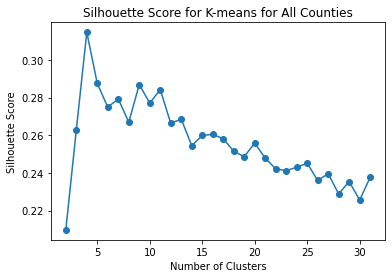

In [22]:
plt.plot(range(2, 51)[:30], silhouette_list[:30], marker = 'o')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score for K-means for All Counties');

In [23]:
kmeans_small = KMeans(n_clusters = 4, random_state = 10)
kmeans_small

KMeans(n_clusters=4, random_state=10)

In [24]:
kmeans_small.fit(X_scaled)

KMeans(n_clusters=4, random_state=10)

In [25]:
labels_small = kmeans_small.labels_

In [26]:
print(f'The silhouette score for KMEANS with four clusters is : {round(silhouette_score(X_scaled, kmeans_small.labels_),3)}.')

The silhouette score for KMEANS with four clusters is : 0.315.


In [27]:
X['labels_small'] = labels_small

<ipython-input-27-5b5e44f1cee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels_small'] = labels_small


In [28]:
X

,percent_below_poverty,smoking_ban_2010,unemployment_rate_2019,average_2011_upper_bound_pct_obesity,rural_urban_continuum_code_2013,labels_small
fips,,,,,,
01001,15.2,none,3.5,42.970,2.0,3
01003,10.4,none,4.0,37.685,3.0,3
01005,30.7,partial,9.4,51.675,6.0,1
01007,18.1,none,7.0,47.940,1.0,1
01009,13.6,none,3.1,45.425,1.0,3
...,...,...,...,...,...,...
56037,11.5,none,5.7,39.170,5.0,3
56039,6.1,partial,0.7,23.825,7.0,2
56041,11.3,none,5.5,39.580,7.0,3


In [29]:
# Reset the index to get the FIPS back into the dataframe to make it export/import correctly.
X.reset_index(inplace = True)

In [30]:
# Export the modeled dataset in so that the `streamlit` app can graph the counties by the clustering label and use the FIPS codes.
X.to_csv(
    '../data/cleaned/kmeans_clusters_with_labels_and_features.csv',
    index = False
)

In [31]:
test_df = pd.read_csv(
    '../data/cleaned/kmeans_clusters_with_labels_and_features.csv',
    dtype = {'fips':object}
)
test_df

,fips,percent_below_poverty,smoking_ban_2010,unemployment_rate_2019,average_2011_upper_bound_pct_obesity,rural_urban_continuum_code_2013,labels_small
0,01001,15.2,none,3.5,42.970,2.0,3
1,01003,10.4,none,4.0,37.685,3.0,3
2,01005,30.7,partial,9.4,51.675,6.0,1
3,01007,18.1,none,7.0,47.940,1.0,1
4,01009,13.6,none,3.1,45.425,1.0,3
...,...,...,...,...,...,...,...
3127,56037,11.5,none,5.7,39.170,5.0,3
3128,56039,6.1,partial,0.7,23.825,7.0,2
3129,56041,11.3,none,5.5,39.580,7.0,3
3130,56043,10.5,none,4.1,38.350,7.0,3


Looks like the exported `.csv` looks good and ready for import to the `streamlit` app.